In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement')

# Test Train Validation Split

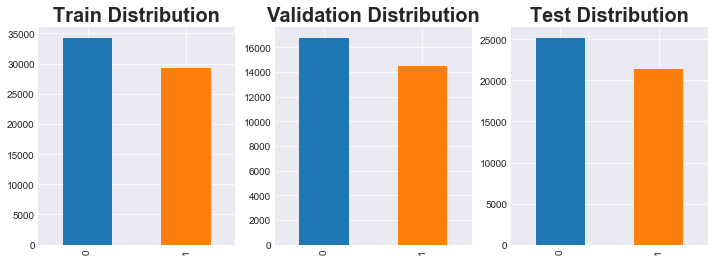

In [3]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [4]:
X_train.describe()

,return,return_1,return_2,zscore_36_return,zscore_288_return,zscore_36_volume,zscore_288_volume,zscore_2016_volume,pma36,pma288,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
count,"63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000",...,"63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000","63,477.0000"
mean,0.0000,0.0000,0.0000,-0.0108,-0.0046,0.1409,0.0310,0.0374,-0.0127,-0.0122,...,0.0262,-0.0114,-0.0102,-0.0055,0.0181,-0.0027,-0.1342,-0.1026,0.0670,-0.0643
std,0.0034,0.0034,0.0034,1.1271,1.0525,2.6259,1.2859,1.1411,1.1068,1.3825,...,1.2771,1.2318,1.4318,1.1830,1.7010,1.2600,1.6235,1.7212,1.2608,1.6250
min,-0.0507,-0.0664,-0.0806,-18.5723,-21.3821,-2.3993,-1.5677,-1.2222,-17.3104,-15.9947,...,-1.5424,-9.1166,-8.9670,-8.3615,-5.3630,-5.3863,-11.1466,-24.7217,-5.3204,-9.4969
25%,-0.0012,-0.0012,-0.0012,-0.5104,-0.4531,-0.5770,-0.4580,-0.3992,-0.6123,-0.9642,...,-0.4589,-0.7315,-1.0107,-0.6755,-1.5382,-0.8351,-1.4181,-1.4797,-0.7867,-1.3726
50%,0.0000,0.0000,0.0000,-0.0029,-0.0035,-0.3395,-0.2912,-0.2679,0.0186,0.0098,...,-0.2933,-0.0077,-0.0056,0.0036,0.0434,-0.2125,-0.3514,-0.3556,-0.1543,-0.1859
75%,0.0013,0.0013,0.0013,0.5215,0.4722,0.2087,0.0824,0.0686,0.6156,0.9554,...,0.0770,0.7212,1.0020,0.6737,1.5620,0.6340,1.2132,1.3717,0.7372,1.2641
max,0.0742,0.0576,0.0742,25.7906,22.6807,335.8571,89.1151,40.2667,12.2855,10.2278,...,84.2282,7.9606,8.7073,6.9211,4.7566,23.7206,12.5787,19.2907,17.5481,15.5399


# Decision Tree

In [5]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 30, 50],
    'class_weight': ['balanced']
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\01-priceMovement"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/55] {'max_depth': 5, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 1.33 sec
train [1/55] {'max_depth': 5, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 1.31 sec
train [2/55] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 1.30 sec
train [3/55] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 1.42 sec
train [4/55] {'max_depth': 5, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 1.40 sec
train [5/55] {'max_depth': 8, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 2.39 sec
train [6/55] {'max_depth': 8, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 1.94 sec
train [7/55] {'max_depth': 8, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 2.00 sec
train [8/55] {'max_depth': 8, 'min_samples_split': 3